Sky Kapoor and Chris Compierchio

This program will simulate the motion of a mass on a spring starting at 3 different points and perform Fourier series analysis on each dataset.

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxw

PART A

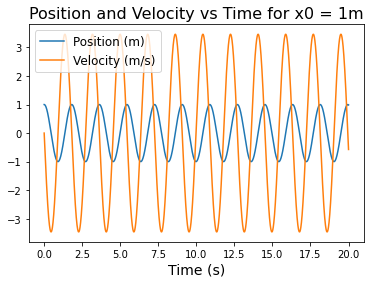

In [4]:
#Define constants
x0 = 1
m = 1
k = 12
c = 3*10**8
dt = 0.0001
t = 20

#Create arrays to store the updated times, positions, and velocities
time = np.zeros(int(t/dt))
v = np.zeros(time.size)
x = np.zeros(time.size)

#Set initial position
x[0] = x0

#Apply the Euler Cromer method to update the times, positions and velocities
for i in range(time.size-1):
    time[i+1] = time[i] + dt
   
    v[i+1] = v[i] - k*x[i]*dt/m
    x[i+1] = x[i] + v[i+1]*dt
    
#Plot the results
plt.plot(time, x, label = "Position (m)")
plt.plot(time, v, label = "Velocity (m/s)")
plt.title("Position and Velocity vs Time for x0 = 1m", fontsize = 16)
plt.xlabel("Time (s)", fontsize = 14)
plt.legend(loc = "best", fontsize = 12)
plt.show()

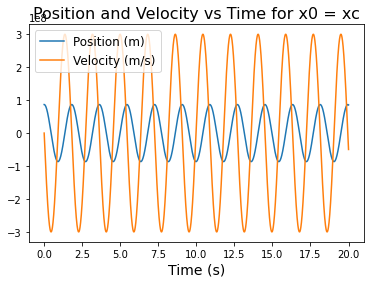

In [5]:
#Repeat but with the initial position as xc
v2 = np.zeros(time.size)
x2 = np.zeros(time.size)

x2[0] = c/np.sqrt(12)

for i in range(time.size-1):
    time[i+1] = time[i] + dt
   
    v2[i+1] = v2[i] - k*x2[i]*dt/m
    x2[i+1] = x2[i] + v2[i+1]*dt
    
    
plt.plot(time, x2, label = "Position (m)")
plt.plot(time, v2, label = "Velocity (m/s)")
plt.title("Position and Velocity vs Time for x0 = xc", fontsize = 16)
plt.xlabel("Time (s)", fontsize = 14)
plt.legend(loc = "best", fontsize = 12)
plt.show()

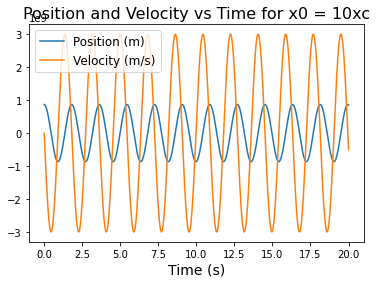

In [6]:
#Repeat but with the intitial position as 10*xc
v3 = np.zeros(time.size)
x3 = np.zeros(time.size)

x3[0] = 10*c/np.sqrt(12)

for i in range(time.size-1):
    time[i+1] = time[i] + dt
   
    v3[i+1] = v3[i] - ((k*x3[i]/m)*(1-((v3[i+1]**2)/(c**2)))**(3/2))*dt
    x3[i+1] = x3[i] + v3[i+1]*dt
    
    
plt.plot(time, x3, label = "Position (m)")
plt.plot(time, v3, label = "Velocity (m/s)")
plt.title("Position and Velocity vs Time for x0 = 10xc", fontsize = 16)
plt.xlabel("Time (s)", fontsize = 14)
plt.legend(loc = "best", fontsize = 12)
plt.show()

PART B

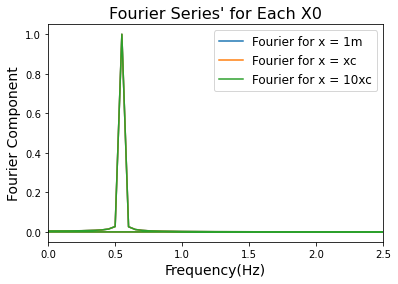

In [8]:
#Calculate the Fourier transforms and the frequencies (x-axis) for each set of position data
ft1 = np.fft.fft(x)
freq1 = np.fft.fftfreq(len(x), d = time[1]-time[0])
ft2 = np.fft.fft(x2)
freq2 = np.fft.fftfreq(len(x2), d = time[1]-time[0])
ft3 = np.fft.fft(x3)
freq3 = np.fft.fftfreq(len(x2), d = time[1]-time[0])

#Plot each Fourier series
plt.plot(freq1,np.abs(ft1)/np.max(np.abs(ft1)), label = "Fourier for x = 1m")
plt.plot(freq2,np.abs(ft2)/np.max(np.abs(ft2)), label = "Fourier for x = xc")
plt.plot(freq3,np.abs(ft3)/np.max(np.abs(ft3)), label = "Fourier for x = 10xc")
plt.xlim(0,2.5)
plt.title("Fourier Series' for Each X0", fontsize = 16)
plt.xlabel("Frequency(Hz)", fontsize = 14)
plt.ylabel("Fourier Component", fontsize = 14)
plt.legend(loc = "best", fontsize = 12)
plt.show()

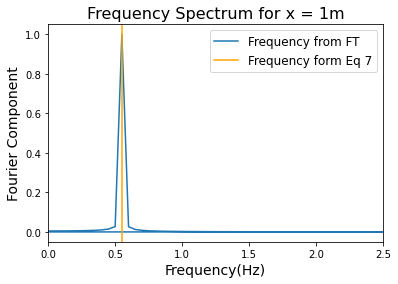

In [9]:
#Define the function g from Lab 3 with x0 = 1m
def g(x):
    return 1/(np.sqrt(k*np.abs(x0**2 - x**2)))

#Define N
N = 100

#Set integration bounds
a = 0
b1 = 1

#Calculate the sample points and weights, then map them to the required
#integration domain for N
x, w = gaussxw(N)
xp = 0.5*(b1-a)*x + 0.5*(b1+a)
wp = 0.5*(b1-a)*w

#Perform the integration
s = 0.0
for j in range(N):
    s += 4*wp[j]*g(xp[j])

#plot the Foureier series and the calculated Frequency
plt.plot(freq1,np.abs(ft1)/np.max(np.abs(ft1)), label = "Frequency from FT")
plt.xlim(0,2.5)
plt.axvline(x = 1/s, color = "orange", label = "Frequency form Eq 7")
plt.title("Frequency Spectrum for x = 1m", fontsize = 16)
plt.xlabel("Frequency(Hz)", fontsize = 14)
plt.ylabel("Fourier Component", fontsize = 14)
plt.legend(loc = "best", fontsize = 12)
plt.show()

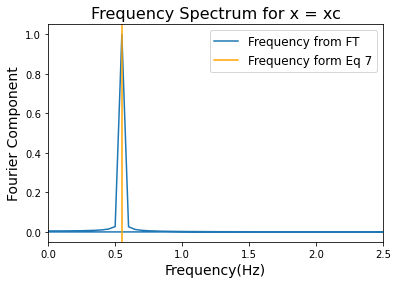

In [10]:
#Repeat but for x0 = xc
def g2(x):
    return 1/(np.sqrt(k*np.abs(b2**2 - x**2)))

b2 = c/np.sqrt(12)

x, w = gaussxw(N)
xp = 0.5*(b2-a)*x + 0.5*(b2+a)
wp = 0.5*(b2-a)*w

s = 0.0
for j in range(N):
    s += 4*wp[j]*g2(xp[j])

plt.plot(freq2,np.abs(ft2)/np.max(np.abs(ft2)), label = "Frequency from FT")
plt.xlim(0,2.5)
plt.axvline(x = 1/s, color = "orange", label = "Frequency form Eq 7")
plt.title("Frequency Spectrum for x = xc", fontsize = 16)
plt.xlabel("Frequency(Hz)", fontsize = 14)
plt.ylabel("Fourier Component", fontsize = 14)
plt.legend(loc = "best", fontsize = 12)
plt.show()

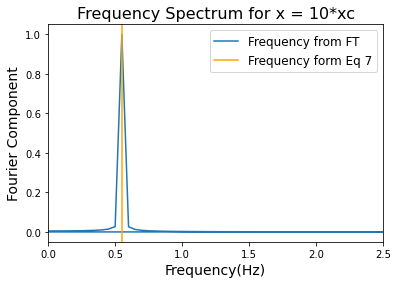

In [12]:
#Repeat but for x0 = 10*xc
def g3(x):
    return 1/(np.sqrt(k*np.abs(b3**2 - x**2)))

b3 = c/np.sqrt(12)

x, w = gaussxw(N)
xp = 0.5*(b3-a)*x + 0.5*(b3+a)
wp = 0.5*(b3-a)*w

s = 0.0
for j in range(N):
    s += 4*wp[j]*g3(xp[j])

plt.plot(freq3,np.abs(ft3)/np.max(np.abs(ft3)), label = "Frequency from FT")
plt.xlim(0,2.5)
plt.axvline(x = 1/s, color = "orange", label = "Frequency form Eq 7")
plt.title("Frequency Spectrum for x = 10*xc", fontsize = 16)
plt.xlabel("Frequency(Hz)", fontsize = 14)
plt.ylabel("Fourier Component", fontsize = 14)
plt.legend(loc = "best", fontsize = 12)
plt.show()